## Sofiia Druchyna
## CMPS 3160: Intro to Data Science 
## Who Do Threat Actors Target in the Cyberspace? What Are They Looking For?

GitHub.io page: https://sof0-0.github.io

In this project, I am planning to use CISSM Cyber Events Dataset. <br>
The information in the dataset brings together open-source information surrounding a range of publically acknowledged cyber events on private and public organizations. <br> 
Events from 2014 through present have been coded to standardize information on threat actor, threat actor country, motive, target, end effects, industry, and country of impact.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_threats = pd.read_csv('./FullThreatActors.csv') # trying to get access to the full databases
display(df_threats)

,Name,Country,Actor Type,Established,Last Seen
0,$2a$45,Undetermined,Criminal,NaN,2018-03-09
1,'desserped',Undetermined,Criminal,NaN,2023-10-11
2,0mega,Undetermined,Criminal,NaN,2023-02-20
3,0x0D1337,Undetermined,Undetermined,NaN,2015-09-30
4,0x2Taylor,Undetermined,Hacktivist,NaN,2016-10-13
...,...,...,...,...,...
1195,NaN,NaN,NaN,NaN,NaN
1196,NaN,NaN,NaN,NaN,NaN
1197,NaN,NaN,NaN,NaN,NaN
1198,NaN,NaN,NaN,NaN,NaN


In the first dataset above, we can see all detected <ins>Threat Actors.</ins>

- Question 1. What are the trends among the cyber threat actors (if there are any) regarding the country origin?
- Question 2. What are the trends among the cyber threat actors regarding their type? 
- Question 3. Were the same threat actors seen multiple times?
- Question 4. Did multiple threat actors act around the same time? If so, does it happen more often that not?

In [16]:
unique_df = df_threats.drop_duplicates()
display(unique_df)

,Name,Country,Actor Type,Established,Last Seen
0,$2a$45,Undetermined,Criminal,NaN,2018-03-09
1,'desserped',Undetermined,Criminal,NaN,2023-10-11
2,0mega,Undetermined,Criminal,NaN,2023-02-20
3,0x0D1337,Undetermined,Undetermined,NaN,2015-09-30
4,0x2Taylor,Undetermined,Hacktivist,NaN,2016-10-13
...,...,...,...,...,...
1114,Zhengquan Zhang,Undetermined,Undetermined,NaN,2017-04-23
1115,Zukr@in,Pakistan,Hacktivist,NaN,2014-10-09
1116,Zurael_sTz,Iran (Islamic Republic of),Hacktivist,NaN,2016-08-02
1117,Zyklon,Undetermined,Hobbyist,NaN,2015-02-03


From this function, we identify that each attack is unique and that there are no duplicated. Multiple occurences of the same threat actor are not recorded.

In [17]:
df_threats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1118 non-null   object 
 1   Country      1117 non-null   object 
 2   Actor Type   1118 non-null   object 
 3   Established  0 non-null      float64
 4   Last Seen    1118 non-null   object 
dtypes: float64(1), object(4)
memory usage: 47.0+ KB


As we can see from the output above, most of the threat actors' origins were undetermined. However, it is important to point out that among the ones that were identified, United States and <br>
Iran were in the leading positions.

In [18]:
# Clean the data for the following diagrams (remove Undetermined after we identified the amount of untracked threats):
filtered_df = df_threats[(df_threats['Actor Type'] != 'Undetermined') & (df_threats['Country'] != 'Undetermined') & (df_threats['Established'] != 'Undetermined') & (df_threats['Last Seen'] != 'Undetermined')]
filtered_df = filtered_df.drop(columns = ['Established']) # drop the Established column as all of them are NaN
filtered_df.dropna()

,Name,Country,Actor Type,Last Seen
44,@THTHerakles,Turkey,Hacktivist,2015-04-13
51,A. S. A. L. A.,Armenia,Hacktivist,2015-11-11
53,Abdellah Elmaghribi,United States of America,Hacktivist,2015-10-15
54,Abdellah Elmaghribi; Moroccan Wolf,Turkmenistan,Hacktivist,2015-04-09
56,Absa employee,South Africa,Criminal,2020-10-27
...,...,...,...,...
1108,Z Company Hacking Crew,India,Hacktivist,2014-10-27
1109,Zarya,Russian Federation,Hacktivist,2022-08-19
1112,Zer0Pwn,Syrian Arab Republic,Hacktivist,2014-04-06
1115,Zukr@in,Pakistan,Hacktivist,2014-10-09


So here, after we cleaned data, we went from 1200 units of observation to around 500 ones with no missing values.

In [19]:
filtered_df['Country'].value_counts()


Country
Russian Federation            72
United States of America      69
Iran (Islamic Republic of)    35
China                         34
India                         32
                              ..
Cuba                           1
Jordan                         1
Ghana                          1
Armenia                        1
Rwanda                         1
Name: count, Length: 78, dtype: int64

<Axes: xlabel='Country'>

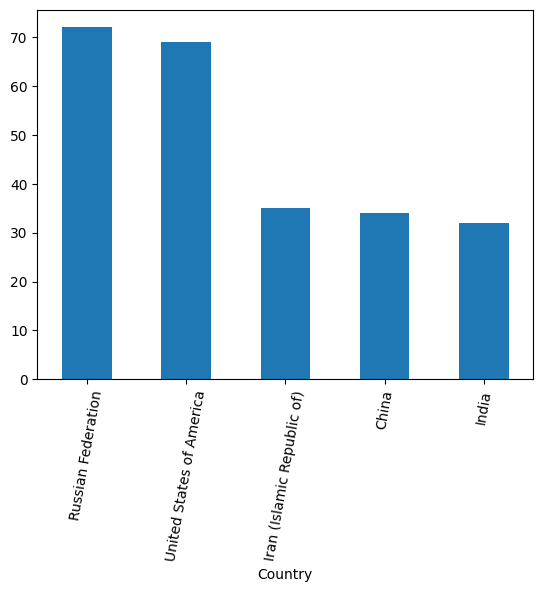

In [20]:
filtered_df['Country'].value_counts().head().plot.bar(rot=80)

In [21]:
us_attacks = filtered_df[filtered_df.Country == "United States of America"]
us_attacks

,Name,Country,Actor Type,Last Seen
53,Abdellah Elmaghribi,United States of America,Hacktivist,2015-10-15
78,AlfabetoVirtual,United States of America,Hacktivist,2015-07-10
93,Amped Attacks AKA sgtbilko420,United States of America,Hacktivist,2015-10-21
99,AnonCoder,United States of America,Hacktivist,2015-05-23
137,Anonymous (USA),United States of America,Hacktivist,2020-06-14
...,...,...,...,...
1064,US Cyber Command,United States of America,Nation-State,2022-06-01
1069,Vanda The God,United States of America,Hacktivist,2021-03-19
1070,VandaTheGod,United States of America,Hacktivist,2019-08-17
1075,Vigilance,United States of America,Hacktivist,2017-06-20


We can observe that most attacks conducted by United States were actually recorder around the same time: a year of 2015 with the same attack type of hactivism, indicating <br>
that these attacks may be actual series of cybercrime or related to a certain vulnerability present at a time.

In [22]:
iran_attacks = filtered_df[filtered_df.Country == "Iran (Islamic Republic of)"]
iran_attacks

,Name,Country,Actor Type,Last Seen
58,Adalat Ali,Iran (Islamic Republic of),Hacktivist,2022-02-01
65,Agrius APT,Iran (Islamic Republic of),Nation-State,2022-02-28
73,al-Tahera,Iran (Islamic Republic of),Hacktivist,2022-07-12
81,Ali's Justice (Edalat-e Ali),Iran (Islamic Republic of),Hacktivist,2023-02-11
88,Altahrea Team,Iran (Islamic Republic of),Hacktivist,2022-07-18
118,Anonymous (Iran),Iran (Islamic Republic of),Hacktivist,2020-01-10
149,Anti WMD Team,Iran (Islamic Republic of),Hacktivist,2014-02-10
159,APT39,Iran (Islamic Republic of),Nation-State,2019-03-04
164,Arvin Club,Iran (Islamic Republic of),Criminal,2021-11-09
208,BlackMagic,Iran (Islamic Republic of),Hacktivist,2022-12-07


In [23]:
filtered_df['Actor Type'].value_counts()

Actor Type
Hacktivist      291
Nation-State     96
Criminal         71
Hobbyist         19
Terrorist         6
Name: count, dtype: int64

<Axes: xlabel='Actor Type'>

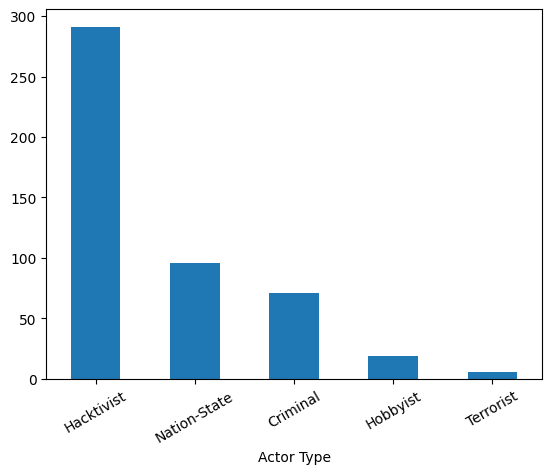

In [24]:
filtered_df['Actor Type'].value_counts().plot.bar(rot=30)

Furthermore, from the Attack Type, we can infer that although majority of attacks remained undetermined, one of the leading attack types was <ins>Hactivism</ins>, followed by criminal motives.

In [26]:
pivot_threats = (filtered_df.
                   groupby('Country')['Actor Type'].
                   value_counts())
pivot_threats.to_frame() # FIGURE OUT IF I CAN DO THE MAP OF THE WORLD AND POINT TO THE COUNTRY...

count
Country                            Actor Type         
Afghanistan                        Nation-State      3
                                   Hobbyist          1
Albania                            Hacktivist        1
Algeria                            Hacktivist        1
Armenia                            Hacktivist        1
...                                                ...
Uzbekistan                         Nation-State      1
Venezuela (Bolivarian Republic of) Hacktivist        1
Viet Nam                           Criminal          1
                                   Hobbyist          1
                                   Nation-State      1

[127 rows x 1 columns]

In [27]:
filtered_df['Year'] = pd.to_datetime(filtered_df['Last Seen']).dt.year # extract the years for the tidier data and our convenience
filtered_df['Year']

44      2015.0
51      2015.0
53      2015.0
54      2015.0
56      2020.0
         ...  
1195       NaN
1196       NaN
1197       NaN
1198       NaN
1199       NaN
Name: Year, Length: 565, dtype: float64

<Axes: xlabel='Year'>

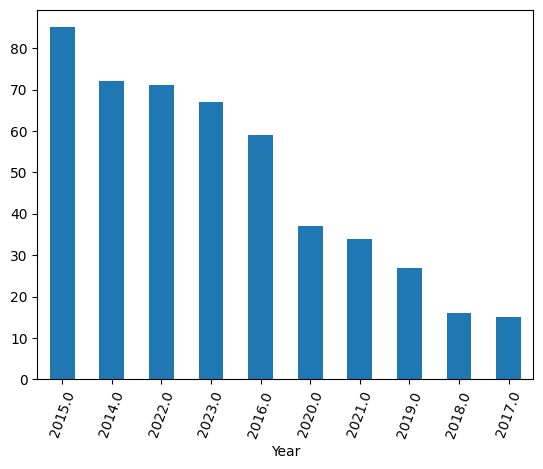

In [28]:
filtered_df['Year'].value_counts().plot.bar(rot=70)

In [29]:
threats_cube = filtered_df.pivot_table(
    index="Country", columns=['Actor Type'],
    values='Year', aggfunc='count')                              # how to make this an int?
threats_cube

Actor Type,Criminal,Hacktivist,Hobbyist,Nation-State,Terrorist
Country,,,,,
Afghanistan,NaN,NaN,1.0,3.0,NaN
Albania,NaN,1.0,NaN,NaN,NaN
Algeria,NaN,1.0,NaN,NaN,NaN
Armenia,NaN,1.0,NaN,NaN,NaN
Australia,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland,3.0,6.0,NaN,1.0,NaN
United States of America,15.0,45.0,5.0,4.0,NaN
Uzbekistan,NaN,NaN,NaN,1.0,NaN


In [ ]:
plt.figure(figsize=(15, 15))  # Set figure size

threats_cube.plot.bar(rot=80, width = 0.8)
plt.xlabel('Country')
plt.ylabel('Threats Count')
plt.title('Threats by Actor Type and Country')
plt.legend(title='Actor Type')
plt.tight_layout()
plt.show()

# FIGURE OUT HOW TO PRESENT THIS DATA THE MOST EFFICIENTLY ^

This graph allows us to see different Actor Types per each country, so we can make conclusions about the types of cyber attacks (or threat actors) that each country is conducting.

In the next dataset, we can see all detected <ins>CyberAttacks.</ins> This dataset is especially interesting for the data analysis as there are several characteristics that we can try to find
correlation among. <br>
- Question 1. When did most attacks occur?
- Question 2. What was the most common victim? Did those victims vary by their income?
- Question 3. What industry was targeted the most?
- Question 4. What are some of the most common actor locations?
- Question 5. What are some of the most common motives?
- Question 6. What are some of the most common attack types? And what were the sub-types of those attacks?
- Question 7. Is there a correlation among all these variables? 


In [31]:
df_attack = pd.read_csv('./FullAttackList.csv')
df_attack

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
0,2023-10-31,United States of America,Smoothie King,Accommodation and Food Services,Undetermined,Undetermined,Financial,Exploitive,Undetermined
1,2023-10-31,Italy,Avangate,Other Services (except Public Administration),Undetermined,Alpha Team,Financial,Mixed,Data Attack
2,2023-10-30,United States of America,Dallas County,Public Administration,Undetermined,PLAY,Financial,Mixed,Data Attack
3,2023-10-30,Russian Federation,National Payment Card System (NSPK),Finance and Insurance,Ukraine,DumpForums and Ukrainian Cyber Alliance,Protest,Disruptive,Message Manipulation
4,2023-10-30,Germany,Südwestfalen IT,"Professional, Scientific, and Technical Services",Undetermined,Undetermined,Financial,Mixed,Data Attack
...,...,...,...,...,...,...,...,...,...
4095,2022-03-31,Undetermined,Undisclosed organization,Undetermined,Russian Federation,ALPHVM,Financial,Disruptive,Data Attack
4096,2022-03-31,United Kingdom of Great Britain and Northern I...,Individuals in the UK,Retail Trade,Undetermined,Undetermined,Financial,Exploitive,Exploitation of End Hosts
4097,2022-03-31,Spain,Iberdrola,Utilities,Undetermined,Undetermined,Financial,Exploitive,Exploitation of Application Server
4098,2022-03-31,Undetermined,Ola Finance,Finance and Insurance,Undetermined,Undetermined,Financial,Exploitive,Exploitation of Application Server


In [32]:
df_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            4100 non-null   object
 1   Location        4100 non-null   object
 2   Victim          4100 non-null   object
 3   Industry        4080 non-null   object
 4   Actor Location  4100 non-null   object
 5   Actor           4100 non-null   object
 6   Motive          4100 non-null   object
 7   Type            4100 non-null   object
 8   Sub-Type        4078 non-null   object
dtypes: object(9)
memory usage: 288.4+ KB


In [36]:
# Clean up the data to remove the Undetermined values from every column:
filtered_att = df_attack[(df_attack['Location'] != 'Undetermined') & (df_attack['Victim'] != 'Undetermined') & (df_attack['Industry'] != 'Undetermined') & (df_attack['Actor Location'] != 'Undetermined') & (df_attack['Actor'] != 'Undetermined') & (df_attack['Motive'] != 'Undetermined') & (df_attack['Type'] != 'Undetermined') & (df_attack['Sub-Type'] != 'Undetermined')]
filtered_att

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
3,2023-10-30,Russian Federation,National Payment Card System (NSPK),Finance and Insurance,Ukraine,DumpForums and Ukrainian Cyber Alliance,Protest,Disruptive,Message Manipulation
7,2023-10-30,United Kingdom of Great Britain and Northern I...,Manchester Airport,Public Administration,Russian Federation,UserSec,Protest,Disruptive,External Denial of Services
8,2023-10-30,United Kingdom of Great Britain and Northern I...,Manchester Airport,Public Administration,Russian Federation,UserSec,Protest,Disruptive,External Denial of Services
16,2023-10-27,Russian Federation,"Three Russian internet providers, Miranda-medi...",Information,Ukraine,Ukrainian IT Army,Protest,Disruptive,External Denial of Services
17,2023-10-27,Sweden,Spotify,Information,Sudan,Anonymous Sudan,Protest,Disruptive,External Denial of Services
...,...,...,...,...,...,...,...,...,...
4073,2022-04-05,Russian Federation,EGAIS,Public Administration,Ukraine,Ukraine IT Army,Protest,Disruptive,External Denial of Service
4074,2022-04-05,Portugal,Sonae,Retail Trade,Russian Federation,GOLD DUPONT,Financial,Mixed,Data Attack
4084,2022-04-02,Germany,Nordex,Manufacturing,Russian Federation,WIZARD SPIDER,Financial,Disruptive,Data Attack
4090,2022-04-01,United States of America,Metagenics,Manufacturing,Russian Federation,Cuba,Financial,Mixed,Data Attack


In [37]:
filtered_att['Date']

3       2023-10-30
7       2023-10-30
8       2023-10-30
16      2023-10-27
17      2023-10-27
           ...    
4073    2022-04-05
4074    2022-04-05
4084    2022-04-02
4090    2022-04-01
4094    2022-03-31
Name: Date, Length: 957, dtype: object

In [38]:
filtered_att.describe()

,Date,Location,Victim,Industry,Actor Location,Actor,Motive,Type,Sub-Type
count,957,957,957,955,957,957,957,957,955
unique,356,70,906,20,19,98,5,3,15
top,2023-07-07,United States of America,Simatra,Public Administration,Russian Federation,NoName057(16),Protest,Disruptive,External Denial of Services
freq,17,170,4,263,754,252,652,640,467


<Axes: xlabel='Location'>

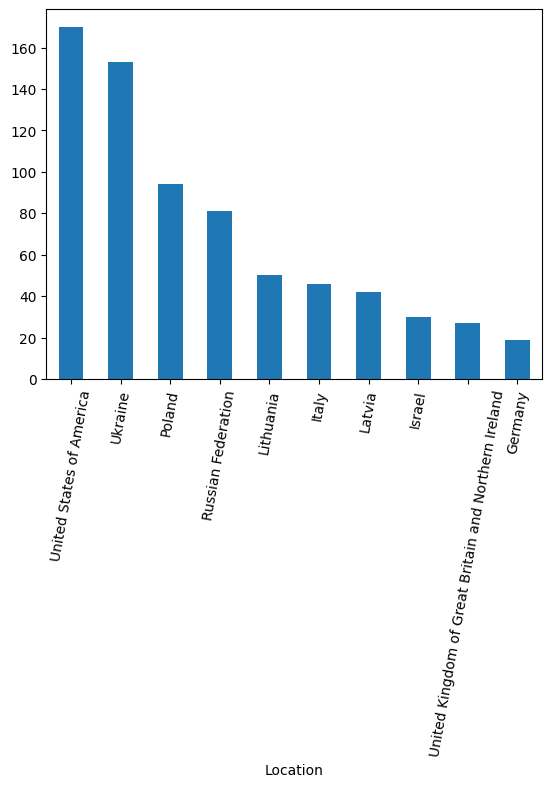

In [42]:
filtered_att['Location'].value_counts().head(n=10).plot.bar(rot=80) # Figure out how to cut long values (map?)

From this table we can see that the most attacks occured on United States, followed by countries in Eastern Europe, which is explained by the ongoing war in that area. However, US has definitely been attacked the most often.

<Axes: xlabel='Industry'>

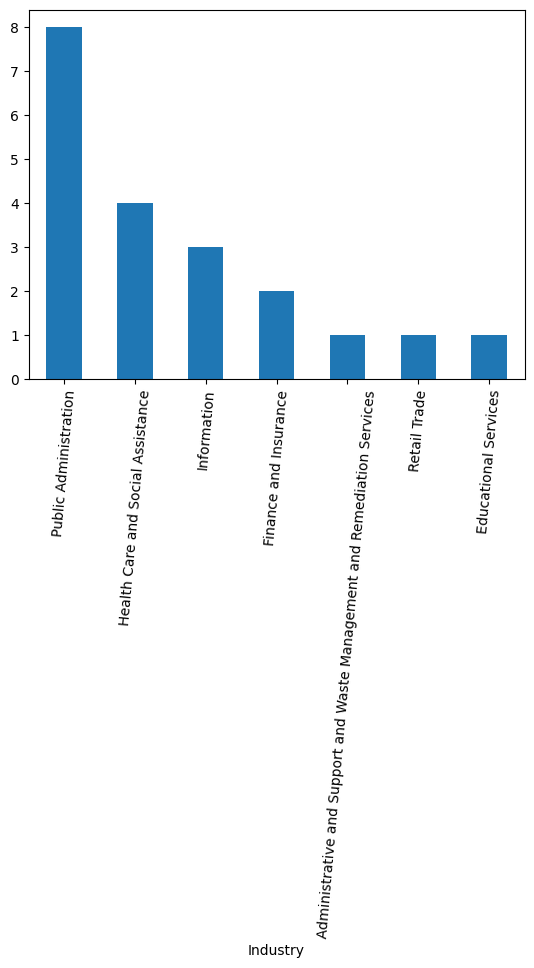

In [40]:
filtered_att['Industry'].head(n=20).value_counts().plot.bar(rot=85) # Figure out how to cut long values (map?)

As we can see, the Public Administration and Health Care industries have been targeted the most. This might be related to the fact that those industries contain numerous personal data, which might allow attackers to steal identities or disrupt the most significant services like healthcare.

<Axes: xlabel='Actor Location'>

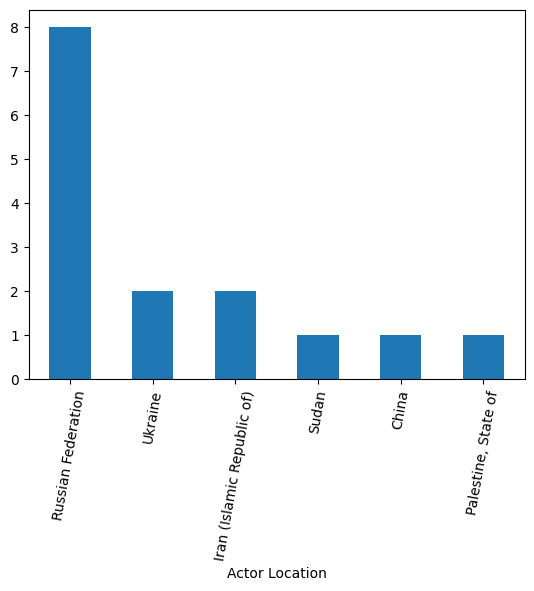

In [44]:
filtered_att['Actor Location'].head(n=15).value_counts().plot.bar(rot=80)

This graph clearly displays that most recent attacks originated from the Russian Federation and Ukraine, followed by Iran.

In [45]:
filtered_att['Actor'].value_counts().head()

Actor
NoName057(16)         252
Killnet                89
ALPHVM                 89
People's CyberArmy     67
Clop                   48
Name: count, dtype: int64

<Axes: xlabel='Motive'>

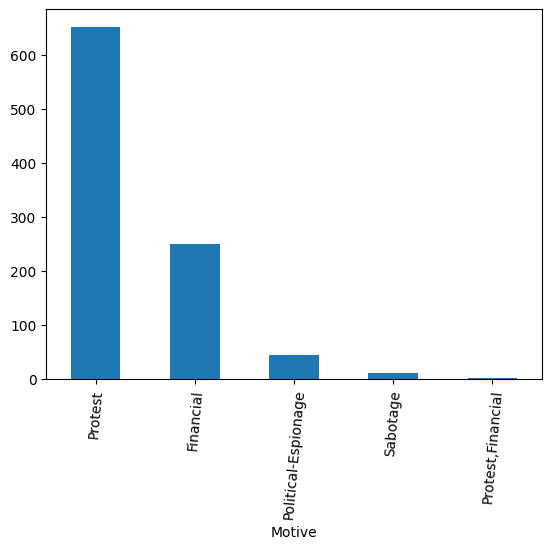

In [46]:
filtered_att['Motive'].value_counts().plot.bar(rot=85)

As we can see, one of the most prevalent motives were protests, followed by the financial. This is a common trend in most cyberattacks as actors go after financial benefit in most cases, trying to extort private data. The prevalence of the protest motives is explained by the political situation in the area.

<Axes: xlabel='Type'>

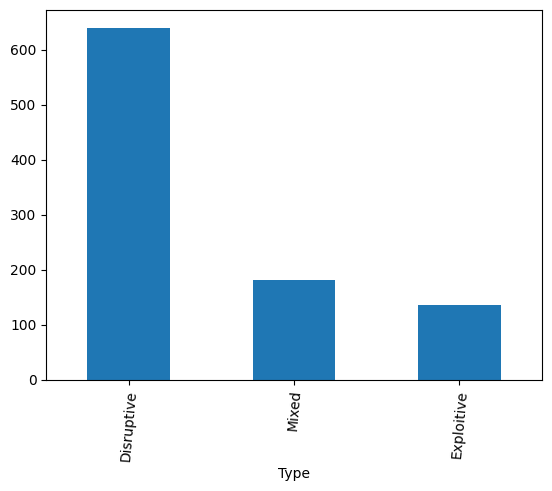

In [47]:
filtered_att['Type'].value_counts().plot.bar(rot=85)

The type of every cyberattack follows the primary motives of the attacker, so, as we identified "Protest" motive as the leading factor, we can also observe that the "Disruptive" type of the attack follows the cause since attackers are trying to disrupt critical systems to change the geopolitical situation.

In [ ]:
filtered_att['Year'] = pd.to_datetime(filtered_att['Date']).dt.year
filtered_att['Year'] = filtered_att['Year'].astype(int) # extract the years for the tidier data and our convenience
filtered_att['Year']

In [49]:
attack_cube = filtered_att.pivot_table(
    index="Location", columns=['Industry'],
    values='Year', aggfunc='count')                              # how to make this an int?
attack_cube # FIGURE OUT HOW TO PLOT THIS TABLE

Industry,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Public Administration,Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
Location,,,,,,,,,,,,,,,,,,,,
Argentina,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,1.0,2.0,NaN,1.0,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom of Great Britain and Northern Ireland,1.0,NaN,NaN,NaN,NaN,3.0,4.0,2.0,1.0,NaN,3.0,NaN,1.0,1.0,7.0,NaN,NaN,4.0,NaN,NaN
United States of America,3.0,1.0,1.0,2.0,NaN,30.0,17.0,29.0,7.0,NaN,11.0,1.0,1.0,18.0,34.0,3.0,1.0,5.0,6.0,NaN
Venezuela (Bolivarian Republic of),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the future milestones, I am planning to provide visualization on the various categories of attackers and cyber crimes and see the existing trends in the ongoing cybercrimes. <br>
Further, it would be interesting to track which attackers caused the most impactful harm to their victims and try to identify the main aspects that led to that conclusion. <br>

One of the future steps would also try to dive into the specic category of victims (e.g. specific Industry sector) and analyze the occuring cybercrimes and their trends. <br> 
(Potentially will choose the healthcare dataset: <ins>U.S. Department of Health and Human Services Office for Civil Rights' Breach Portal </ins> )